In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

u_exact = lambda k1,k2: lambda x,y: np.cos(np.pi*k1*x)*np.cos(np.pi*k2*y)
f = lambda k1,k2: lambda x,y: ((np.pi*k1)**2+(np.pi*k2)**2)*u_exact(k1,k2)(x,y)
g1 = lambda k1,k2: lambda y: u_exact(k1,k2)(0,y)
g2 = lambda k1,k2: lambda y: u_exact(k1,k2)(2,y)
h1 = lambda k1,k2: lambda x: u_exact(k1,k2)(x,0)
h2 = lambda k1,k2: lambda x: u_exact(k1,k2)(x,2)

In [2]:
import liliya as lb

In [3]:
k1, k2, n = 0.5, 1.5, 32
u, num, r = lb.Poisson2D(f(k1,k2), n, domain=[0,2], 
                         bdry_cond=[[g1(k1,k2), g2(k1,k2)],[h1(k1,k2), h2(k1,k2)]], method='Jacobi')

0.0042005546781300595

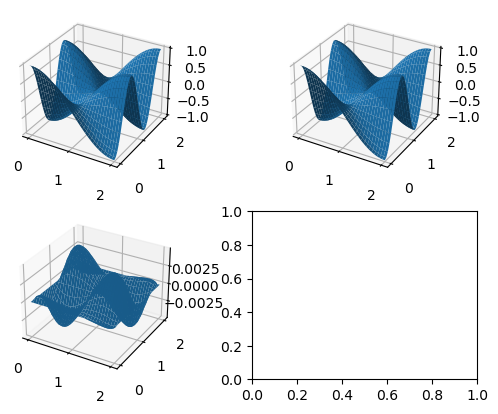

In [4]:
x = np.linspace(0, 2, n+1)
y = np.linspace(0,2, n+1)
[X,Y]=np.meshgrid(x,y)
ue = u_exact(k1,k2)(X,Y)
fig, ax = plt.subplots(2,2)
ax[0,0].remove()
ax[0,0]=fig.add_subplot(2,2,1,projection='3d')
ax[0,0].plot_surface(X,Y,u)
ax[0,1].remove()
ax[0,1]=fig.add_subplot(2,2,2,projection='3d')
ax[0,1].plot_surface(X,Y,ue)
ax[1,0].remove()
ax[1,0]=fig.add_subplot(2,2,3,projection='3d')
ax[1,0].plot_surface(X,Y,u-ue)
LA.norm(u-ue,2)*2/n

# L2 norm of the error

\begin{align}
E=\|u-u^*\|_2&=\sqrt{\sum_{i,j}(u_{i,j}-u^*_{i,j})^2h^2}\\
&=\sqrt{\sum_{i,j}(u_{i,j}-u^*_{i,j})^2}\cdot h\\
&=np.norm(u-u^*,2)\cdot h
\end{align}

# The order of the discretization error:

$$E = O(h^2)= O(n^{-2})$$

$$E = Cn^{-2}$$

$$\log(E) = \log(C)-2\log(n)$$

In [16]:
N = [16, 32, 64]
E = [0.01688, 0.00420, 0.00103]

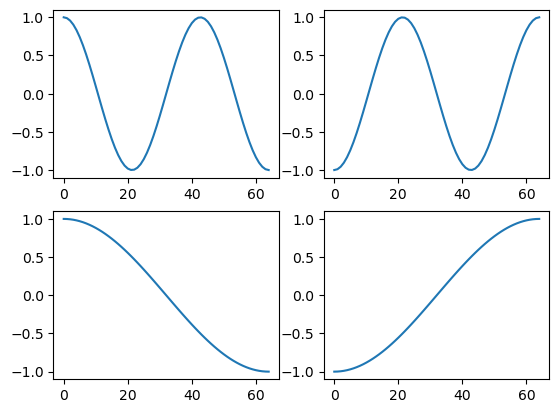

In [18]:
u = np.zeros((n+1, n+1))
bdry_cond=[[g1(k1,k2), g2(k1,k2)],[h1(k1,k2), h2(k1,k2)]]
u[:,0] = bdry_cond[0][0](y)
u[:,n] = bdry_cond[0][1](y)
u[0,:] = bdry_cond[1][0](x)
u[n,:] = bdry_cond[1][1](x)
fig, ax = plt.subplots(2,2)
ax[0,0].plot(u[:,0])
ax[0,1].plot(u[:,n])
ax[1,0].plot(u[0,:])
ax[1,1].plot(u[n,:])


In [5]:
N = [16, 32, 64]
M = ['Jacobi','GS','SOR']
Tests = [(0.5, 1.5), (2, 3), (4.5, 2)]
E = np.zeros((3,3,len(Tests)))
oc = np.zeros((3,len(Tests)))
for i, n in enumerate(N):
    for j, m in enumerate(M):
        for k, (k1, k2) in enumerate(Tests):
            print(i, j, k, k1, k2)
            u, num, r = lb.Poisson2D(f(k1,k2), n, domain=[0,2], 
                         bdry_cond=[[g1(k1,k2), g2(k1,k2)],[h1(k1,k2), h2(k1,k2)]], method=m)
            x = np.linspace(0, 2, n+1)
            y = np.linspace(0,2, n+1)
            [X,Y]=np.meshgrid(x,y)
            ue = u_exact(k1,k2)(X,Y)
            E[i,j,k] = LA.norm(u-ue,2)*2/n
for j, m in enumerate(M):
    for k, (k1, k2) in enumerate(Tests):
        oc[j,k] = np.polyfit(np.log(N),np.log(E[:,j,k]),1)[0]

0 0 0 0.5 1.5
0 0 1 2 3
0 0 2 4.5 2
0 1 0 0.5 1.5
0 1 1 2 3
0 1 2 4.5 2
0 2 0 0.5 1.5
0 2 1 2 3
0 2 2 4.5 2
1 0 0 0.5 1.5
1 0 1 2 3
1 0 2 4.5 2
1 1 0 0.5 1.5
1 1 1 2 3
1 1 2 4.5 2
1 2 0 0.5 1.5
1 2 1 2 3
1 2 2 4.5 2
2 0 0 0.5 1.5
2 0 1 2 3
2 0 2 4.5 2
2 1 0 0.5 1.5
2 1 1 2 3
2 1 2 4.5 2
2 2 0 0.5 1.5
2 2 1 2 3
2 2 2 4.5 2


In [6]:
oc

array([[-2.01233856, -2.04080025, -2.0819892 ],
       [-2.00511236, -2.04080529, -2.08198862],
       [-2.00225222, -2.04080379, -2.08197724]])

In [23]:
E

array([[0.01688249, 0.01688582, 0.01688549],
       [0.00420042, 0.00420761, 0.00420703],
       [0.00103721, 0.00104791, 0.00105205]])

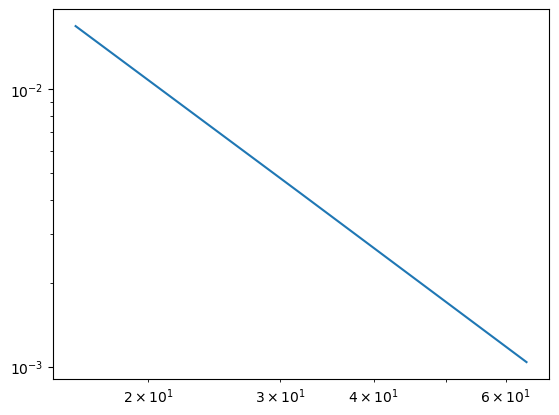

In [25]:
plt.loglog(N, E[:,0])

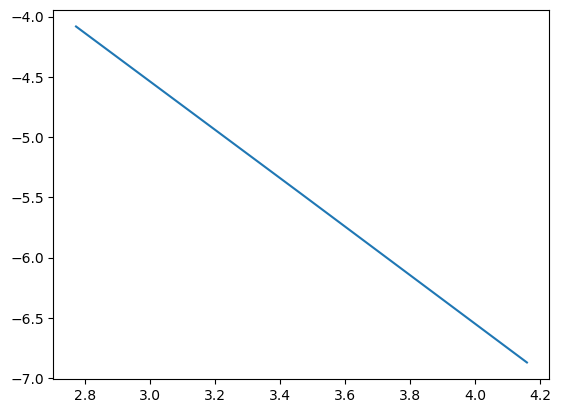

In [27]:
plt.plot(np.log(N),np.log(E[:,0]))

In [32]:
sl = np.polyfit(np.log(N),np.log(E[:,0]),1)[0]

-2.012373120377913